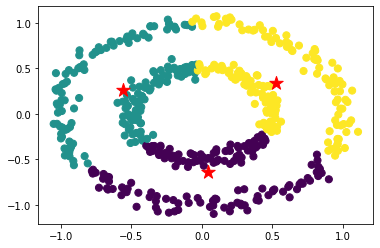

In [8]:
#1 zad

from sklearn import datasets
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt

def generate_data(n_samples, flagc):
    if flagc == 1:
        random_state = 365
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state) 
    elif flagc == 2:
        random_state = 148
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)      
    elif flagc == 3:
        random_state = 148
        X, y = datasets.make_blobs(n_samples=n_samples,
                          cluster_std=[[1.0, 2.5], [0.5, 3.0], [1.5, 2.5]],
                          random_state=random_state)
    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)        
    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)   
    else:
        X = []       
    return X

n_samples = 500
flagc = 4

X = generate_data(n_samples, flagc)
kmeans=cluster.KMeans(n_clusters=3, random_state=7).fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1, marker="*");

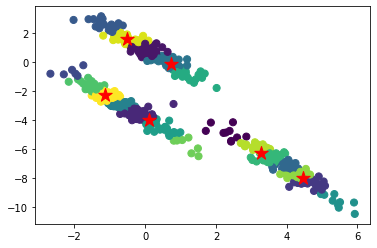

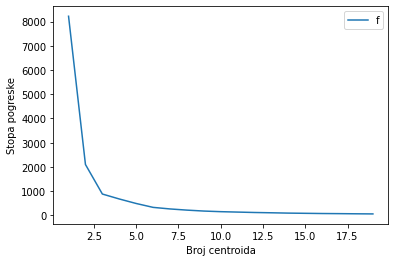

Optimalan broj centroida je  6


In [4]:
#2 zad

from sklearn import datasets
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt

def generate_data(n_samples, flagc):   
    if flagc == 1:
        random_state = 365
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)       
    elif flagc == 2:
        random_state = 148
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)       
    elif flagc == 3:
        random_state = 148
        X, y = datasets.make_blobs(n_samples=n_samples,
                          cluster_std=[[1.0, 2.5], [0.5, 3.0], [1.5, 2.5]],
                          random_state=random_state)
    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)       
    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)   
    else:
        X = []      
    return X

J=[]
n_samples=500
flagc=2

X=generate_data(n_samples, flagc)
optimalCenterAmount=0
for iter in range(1,20):
    kmeans=cluster.KMeans(n_clusters=iter, random_state=77).fit(X)
    y_kmeans = kmeans.predict(X)
    if(len(J)>0):
        if(kmeans.inertia_<min(J)*0.8):
            optimalCenterAmount=iter
    J.append(kmeans.inertia_)
kmeans=cluster.KMeans(n_clusters=optimalCenterAmount, random_state=77).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)
centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1, marker="*");
plt.figure()
plt.plot(np.arange(19)+1,J,label="f")
plt.xlabel("Broj centroida")
plt.ylabel("Stopa pogreske")
plt.legend()
plt.show()
print("Optimalan broj centroida je ",optimalCenterAmount)


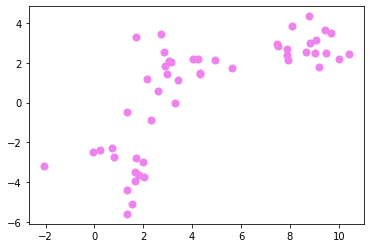

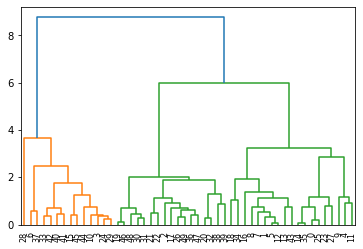

In [5]:
#3 zad

from sklearn import datasets
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage 
import matplotlib.pyplot as plt

def generate_data(n_samples, flagc):    
    if flagc == 1:
        random_state = 365
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)        
    elif flagc == 2:
        random_state = 148
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)        
    elif flagc == 3:
        random_state = 148
        X, y = datasets.make_blobs(n_samples=n_samples,
                          cluster_std=[[1.0, 2.5], [0.5, 3.0], [1.5, 2.5]],
                          random_state=random_state)
    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)        
    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)   
    else:
        X = []  
    return X

n_samples = 50
flagc = 1
X = generate_data(n_samples, flagc)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c='violet', s=50)
plt.show()
Y=linkage(X,method='weighted',metric='euclidean')
dendrogram = dendrogram(Y)

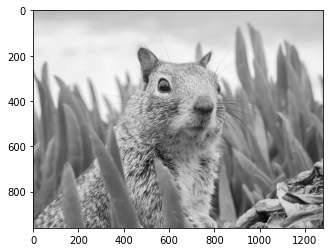

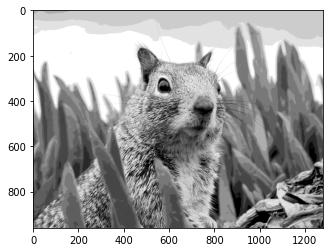

In [7]:
#4 zad

import scipy as sp
from sklearn import cluster, datasets
import numpy as np
import matplotlib.pyplot as plt
import cv2
    
img = cv2.imread(r'example_grayscale.png', 0)

X = img.reshape((-1, 1))
k_means = cluster.KMeans(n_clusters=10, n_init=1)
k_means.fit(X) 
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
img_compressed = np.choose(labels, values)
img_compressed.shape = img.shape

plt.figure(1)
plt.imshow(img,  cmap='gray')
plt.figure(2)
plt.imshow(img_compressed,  cmap='gray')

(960, 1280, 3)


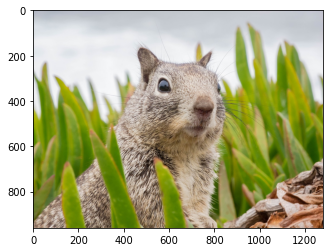

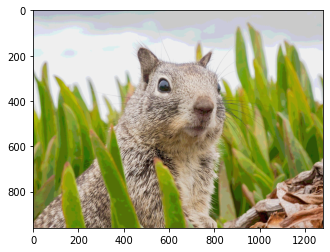

In [10]:
#5 zad

import scipy as sp
from sklearn import cluster
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg

img = mpimg.imread(r'example.png') 

X = img.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=10, n_init=1)
k_means.fit(X) 
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
img_compressed = np.choose(labels, values)
img_compressed.shape = img.shape

print(img_compressed.shape)
plt.figure(1)
plt.imshow(img)
plt.figure(2)
plt.imshow(img_compressed)

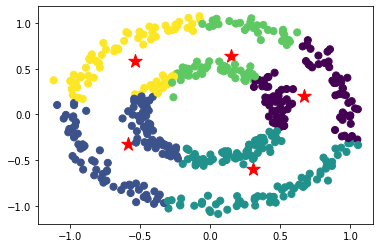

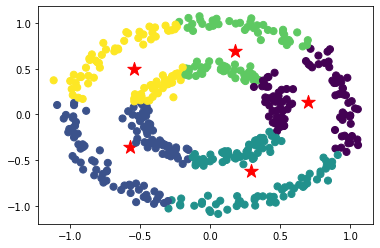

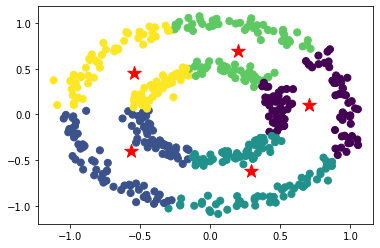

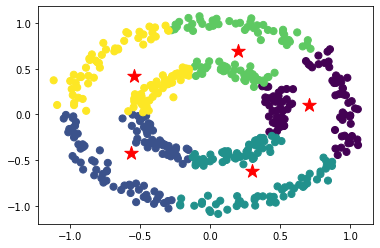

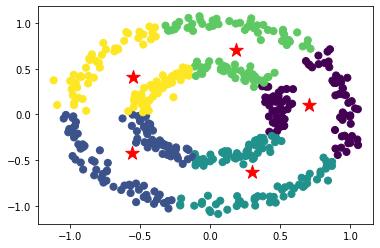

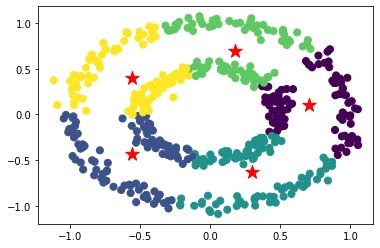

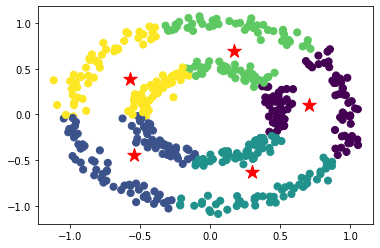

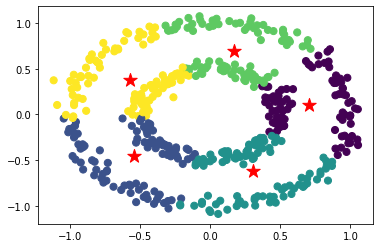

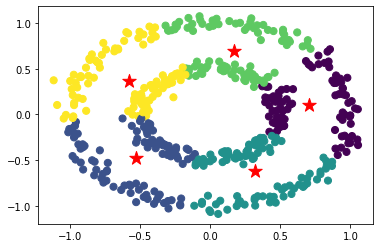

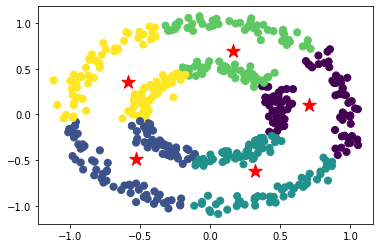

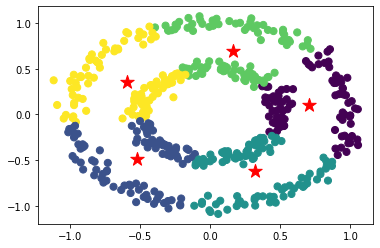

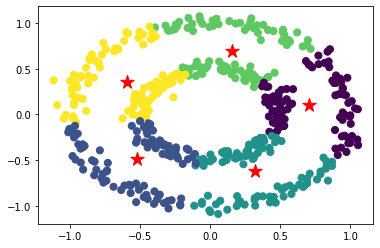

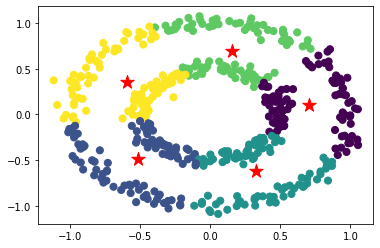

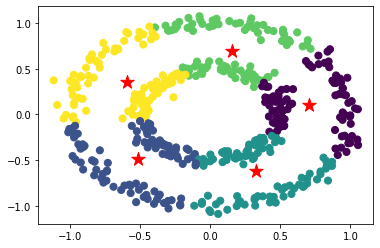

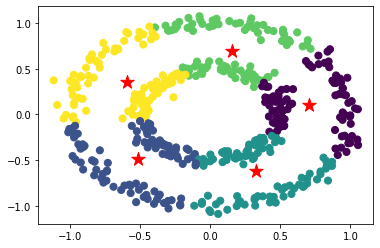

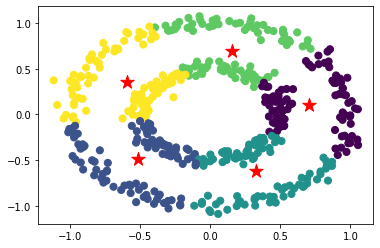

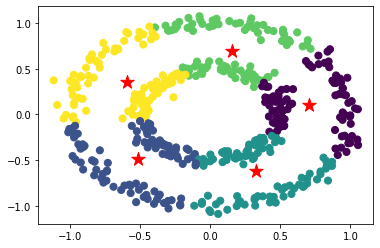

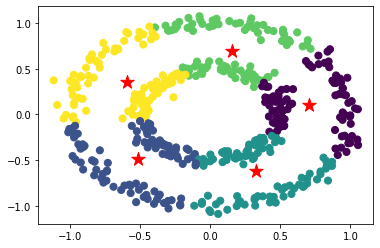

In [11]:
#6 zad

from sklearn import datasets
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
import random
import math

def generate_data(n_samples, flagc):   
    if flagc == 1:
        random_state = 365
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)       
    elif flagc == 2:
        random_state = 148
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)        
    elif flagc == 3:
        random_state = 148
        X, y = datasets.make_blobs(n_samples=n_samples,
                          cluster_std=[[1.0, 2.5], [0.5, 3.0], [1.5, 2.5]],
                          random_state=random_state)
    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)        
    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)   
    else:
        X = []       
    return X

def getDistance(a, b):
    distance=math.sqrt(pow(a[0]-b[0],2)+pow(a[1]-b[1],2))
    return distance

J = []
n_samples = 500
flagc = 4

X=generate_data(n_samples, flagc)
labels=np.zeros(500)
numberOfCenters=5
values=np.zeros((numberOfCenters,X[0].size))

for i in range(numberOfCenters):
    values[i]=X[random.randint(0,499)]
    
for iter in range(0,20):
    for i in range(X[:,0].size):
        distance=getDistance(X[i],values[0])
        labels[i]=0
        for j in range(1,numberOfCenters):
            if(getDistance(X[i],values[j])<distance):
                distance=getDistance(X[i],values[j])
                labels[i]=j
    for i in range(numberOfCenters):
        values[i][0]=np.mean(X[labels==i][:,0])
        values[i][1]=np.mean(X[labels==i][:,1])  
    plt.scatter(values[:, 0], values[:, 1], c='red', s=200, alpha=1, marker="*");
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)
    plt.show()